In [ ]:

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPool2D, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras.callbacks import Callback
from tensorflow.keras.callbacks import LearningRateScheduler,EarlyStopping, ModelCheckpoint

import os
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
print(tf.__version__)

2.8.2


In [ ]:
!cat /proc/cpuinfo

processor	: 0
vendor_id	: GenuineIntel
cpu family	: 6
model		: 63
model name	: Intel(R) Xeon(R) CPU @ 2.30GHz
stepping	: 0
microcode	: 0x1
cpu MHz		: 2299.998
cache size	: 46080 KB
physical id	: 0
siblings	: 2
core id		: 0
cpu cores	: 1
apicid		: 0
initial apicid	: 0
fpu		: yes
fpu_exception	: yes
cpuid level	: 13
wp		: yes
flags		: fpu vme de pse tsc msr pae mce cx8 apic sep mtrr pge mca cmov pat pse36 clflush mmx fxsr sse sse2 ss ht syscall nx pdpe1gb rdtscp lm constant_tsc rep_good nopl xtopology nonstop_tsc cpuid tsc_known_freq pni pclmulqdq ssse3 fma cx16 pcid sse4_1 sse4_2 x2apic movbe popcnt aes xsave avx f16c rdrand hypervisor lahf_lm abm invpcid_single ssbd ibrs ibpb stibp fsgsbase tsc_adjust bmi1 avx2 smep bmi2 erms invpcid xsaveopt arat md_clear arch_capabilities
bugs		: cpu_meltdown spectre_v1 spectre_v2 spec_store_bypass l1tf mds swapgs
bogomips	: 4599.99
clflush size	: 64
cache_alignment	: 64
address sizes	: 46 bits physical, 48 bits virtual
power management:

processor	:

In [1]:
!nvidia-smi

Wed Sep  7 15:33:51 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   54C    P8    10W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip /content/drive/MyDrive/AI/Dataset_Train_Test.zip

Streaming output truncated to the last 5000 lines.
  inflating: Dataset_Train_Test/train/Sangay_Tenzin/779.jpg  
  inflating: Dataset_Train_Test/train/Sangay_Tenzin/78.jpg  
  inflating: Dataset_Train_Test/train/Sangay_Tenzin/780.jpg  
  inflating: Dataset_Train_Test/train/Sangay_Tenzin/781.jpg  
  inflating: Dataset_Train_Test/train/Sangay_Tenzin/782.jpg  
  inflating: Dataset_Train_Test/train/Sangay_Tenzin/783.jpg  
  inflating: Dataset_Train_Test/train/Sangay_Tenzin/784.jpg  
  inflating: Dataset_Train_Test/train/Sangay_Tenzin/788.jpg  
  inflating: Dataset_Train_Test/train/Sangay_Tenzin/789.jpg  
  inflating: Dataset_Train_Test/train/Sangay_Tenzin/79.jpg  
  inflating: Dataset_Train_Test/train/Sangay_Tenzin/790.jpg  
  inflating: Dataset_Train_Test/train/Sangay_Tenzin/791.jpg  
  inflating: Dataset_Train_Test/train/Sangay_Tenzin/792.jpg  
  inflating: Dataset_Train_Test/train/Sangay_Tenzin/793.jpg  
  inflating: Dataset_Train_Test/train/Sangay_Tenzin/794.jpg  
  inflating: Dataset_

In [ ]:
CLASS_NUM = 6
DATA_PATH= '/content/Dataset_Train_Test/'
WIDTH = 128
HEIGHT = 128
CHANNEL = 3
EPOCHS = 100
BATCH_SIZE = 256

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   rotation_range=15,
                                   horizontal_flip=True,
                                   fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    DATA_PATH+'train/',
    target_size = (HEIGHT, WIDTH),
    batch_size = BATCH_SIZE,
    class_mode = 'sparse',
        shuffle = True
)

test_generator = test_datagen.flow_from_directory(
    DATA_PATH+'test/',
    target_size = (HEIGHT, WIDTH),
    batch_size = BATCH_SIZE,
    class_mode='sparse',
    shuffle=False
)

Found 9600 images belonging to 6 classes.
Found 2400 images belonging to 6 classes.


## Visualizing Training Images

In [ ]:
#next function returns two two output x_train and y_train
sample_training_images, _ = next(train_generator)

In [ ]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(10,10))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

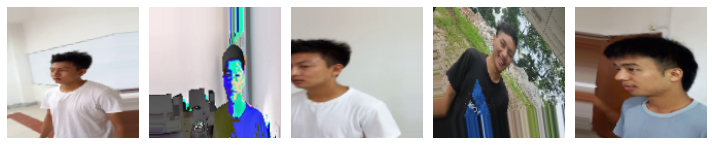

In [ ]:
plotImages(sample_training_images[:5])

#CNN 16 3x3 filters

In [ ]:
# VGG16 Style Architecture
model = tf.keras.Sequential()
model.add(Conv2D(32, (5, 5), input_shape=(HEIGHT, WIDTH, CHANNEL), activation='relu', padding='same'))
model.add(Conv2D(32, (5, 5), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2), strides=2))
model.add(Dropout(0.2))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2), strides=2))
model.add(Dropout(0.2))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2), strides=2))
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(CLASS_NUM, activation="softmax"))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      2432      
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 32)      25632     
                                                                 
 batch_normalization (BatchN  (None, 128, 128, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 64, 64, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 62, 62, 64)        1

In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
filepath="weights-improvement-{epoch:02d}-{val_accuracy:.2f}.h5"

# Call back
checkpoint = ModelCheckpoint(filepath, monitor = ['val_accuracy'], verbose = 1  , mode = 'max')
sheduler_lr = LearningRateScheduler(lambda x: 1e-3 * 0.9 ** x)
callbacks_list = [checkpoint, sheduler_lr]

# Steps
SPE = len(train_generator)
VS = len(test_generator)

In [ ]:
history = model.fit(
    train_generator,
    steps_per_epoch = SPE,
    validation_data = test_generator,
    validation_steps = VS,
    epochs = EPOCHS,
    callbacks = callbacks_list
)

Epoch 1/100
38/38 [==============================] - ETA: 0s - loss: 5.5802 - accuracy: 0.4266
Epoch 1: saving model to weights-improvement-01-0.12.h5
38/38 [==============================] - 89s 2s/step - loss: 5.5802 - accuracy: 0.4266 - val_loss: 5.1808 - val_accuracy: 0.1158 - lr: 0.0010
Epoch 2/100
38/38 [==============================] - ETA: 0s - loss: 1.2586 - accuracy: 0.5744
Epoch 2: saving model to weights-improvement-02-0.27.h5
38/38 [==============================] - 63s 2s/step - loss: 1.2586 - accuracy: 0.5744 - val_loss: 2.0797 - val_accuracy: 0.2654 - lr: 9.0000e-04
Epoch 3/100
38/38 [==============================] - ETA: 0s - loss: 0.8790 - accuracy: 0.6697
Epoch 3: saving model to weights-improvement-03-0.25.h5
38/38 [==============================] - 63s 2s/step - loss: 0.8790 - accuracy: 0.6697 - val_loss: 4.4561 - val_accuracy: 0.2508 - lr: 8.1000e-04
Epoch 4/100
38/38 [==============================] - ETA: 0s - loss: 0.7381 - accuracy: 0.7202
Epoch 4: saving mo

In [ ]:
# Test Accuracy
scores = model.evaluate(test_generator, steps=len(test_generator), verbose=1)
print("Test Accuracy: %.2f%%" % (scores[1]*100))

10/10 [==============================] - 6s 577ms/step - loss: 0.1350 - accuracy: 0.9542
Test Accuracy: 95.42%


In [ ]:
# Train Accuracy
scores = model.evaluate(train_generator, steps=len(train_generator), verbose=1)
print("Train Accuracy: %.2f%%" % (scores[1]*100))

38/38 [==============================] - 54s 1s/step - loss: 0.1304 - accuracy: 0.9534
Train Accuracy: 95.34%


In [ ]:
len(train_generator)

38

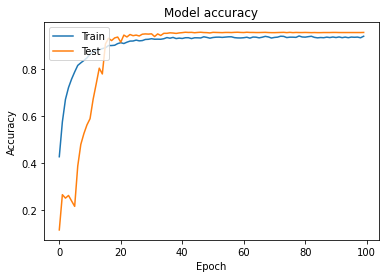

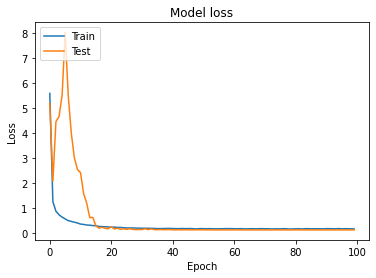

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

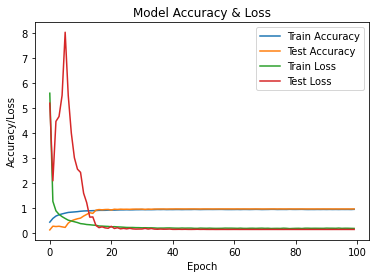

In [ ]:

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Accuracy & Loss')
plt.ylabel('Accuracy/Loss')
plt.xlabel('Epoch')
plt.legend(['Train Accuracy', 'Test Accuracy', 'Train Loss', 'Test Loss'])
plt.show()

# Plot training & validation loss values
# plt.plot(history.history['loss'])
# plt.plot(history.history['val_loss'])
# plt.title('Model loss')
# plt.ylabel('Loss')
# plt.xlabel('Epoch')
# plt.legend(['Train Accuracy', 'Test Accuracy', 'Train Loss', 'Test Loss'], loc='upper left')
# plt.show()
#loc='upper left'

In [ ]:
classes = test_generator.class_indices
print(classes)

{'Ngawang_Samten': 0, 'Pema_Thinley': 1, 'Sangay_Tenzin': 2, 'Sonam_Rabgay': 3, 'Tashi_Phuntsho': 4, 'Yadu_Nepal': 5}


## Confusion Matrix for Testing

In [ ]:
#Confution Matrix and Classification Report
from sklearn.metrics import classification_report, confusion_matrix
Y_pred = model.predict_generator(test_generator, len(test_generator))
y_pred = np.argmax(Y_pred, axis=1)
# print(y_pred)
print('Confusion Matrix')
print(confusion_matrix(test_generator.classes, y_pred))
# print(val_generator.classes)
print('Classification Report')
target_names = ['Ngawang', 'Pema', 'Sangay', 'Sonam', 'Tashi', 'Yadu']
print(classification_report(test_generator.classes, y_pred, target_names=target_names))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  This is separate from the ipykernel package so we can avoid doing imports until


Confusion Matrix
[[379   1  10   0   2   8]
 [  1 385   1   0   2  11]
 [ 12   6 370   4   1   7]
 [  2   1   4 381   4   8]
 [  0   0   0   5 388   7]
 [  1   2   4   3   3 387]]
Classification Report
              precision    recall  f1-score   support

     Ngawang       0.96      0.95      0.95       400
        Pema       0.97      0.96      0.97       400
      Sangay       0.95      0.93      0.94       400
       Sonam       0.97      0.95      0.96       400
       Tashi       0.97      0.97      0.97       400
        Yadu       0.90      0.97      0.93       400

    accuracy                           0.95      2400
   macro avg       0.95      0.95      0.95      2400
weighted avg       0.95      0.95      0.95      2400



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  """


Text(0.5, 1.0, 'Confusion Matrix')

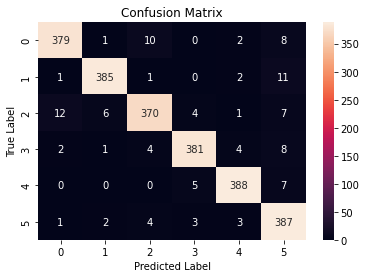

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.metrics import confusion_matrix
Y_pred = model.predict_generator(test_generator, len(test_generator))
matrix = confusion_matrix(test_generator.classes, y_pred)
sns.heatmap(matrix,annot=True,cbar=True, fmt='d')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  """


Text(0.5, 1.0, 'Confusion Matrix')

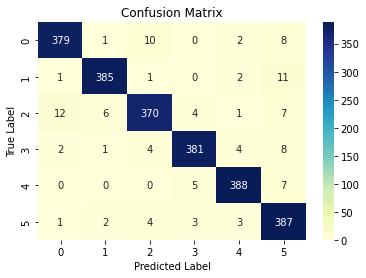

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.metrics import confusion_matrix
Y_pred = model.predict_generator(test_generator, len(test_generator))
matrix = confusion_matrix(test_generator.classes, y_pred)
sns.heatmap(matrix,annot=True,cbar=True, cmap="YlGnBu", fmt='d')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix')